In [1]:
from prophet import Prophet

In [2]:
import pandas as pd
df = pd.read_csv('result.csv')
df

,Unnamed: 0,日付,人数
0,0,2020-01-24,1
1,1,2020-01-25,1
2,2,2020-01-30,1
3,3,2020-02-13,1
4,4,2020-02-14,2
...,...,...,...
677,677,2021-12-27,35
678,678,2021-12-28,45
679,679,2021-12-29,76
680,680,2021-12-30,63


In [3]:
new_df = df.rename(columns={'日付': 'ds', '人数': 'y'})
train_df = new_df
train_df.tail()

,Unnamed: 0,ds,y
677,677,2021-12-27,35
678,678,2021-12-28,45
679,679,2021-12-29,76
680,680,2021-12-30,63
681,681,2021-12-31,78


In [4]:
event_dataframe = pd.read_csv('event1.csv')
event_dataframe.tail()

,Unnamed: 0,holiday,ds
62,62,文化の日,2022-11-03
63,63,勤労感謝の日,2022-11-23
64,64,クリスマスイヴ,2022-12-24
65,65,クリスマス,2022-12-25
66,66,大晦日,2022-12-31


In [5]:
# モデルの作成
model = Prophet(
    growth='logistic', # 傾向変動の関数．非線形は'logistic'一般的なビジネス/金融データは非線形なのでlogistic。
    yearly_seasonality = True, # 年次の季節変動を考慮有無
    weekly_seasonality = True, # 週次の季節変動を考慮有無
    daily_seasonality = False, # 日次の季節変動を考慮有無
    changepoints = None, #  傾向変化点のリスト 
    changepoint_range = 1, # 傾向変化点の候補の幅で先頭からの割合。
    changepoint_prior_scale = 0.5, # 傾向変化点の事前分布のスケール値。パラメータの柔軟性 トレンドの変化がオーバーフィット（柔軟性が高すぎる）またはアンダーフィット（柔軟性が不十分）の場合、 入力引数を使用する前にスパースの強度を調整できます。
    n_changepoints = 5, # 傾向変化点の数 changepointの場所を手動で設定したい場合これを使う Changepointとは、データ中で「トレンドが大きく変わったと思われる」点のことです。 changepointは自動検出されるが、手動でカスタマイズできる。 n_changepointsではトレンドの変更点の数を手動で設定できる。デフォルトでは25。
    holidays= event_dataframe
) 
train_df['cap'] = 7000 # logisticモデルを選択する場合は必ずcapの設定が必須。最大値は'cap'、最小値は'floor'で指定できる

model.fit(train_df)

02:49:05 - cmdstanpy - INFO - Chain [1] start processing
02:49:06 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
predict_num = 267
future = model.make_future_dataframe(periods = predict_num ,freq='d')
future.tail(267)

,ds
682,2022-01-01
683,2022-01-02
684,2022-01-03
685,2022-01-04
686,2022-01-05
...,...
944,2022-09-20
945,2022-09-21
946,2022-09-22
947,2022-09-23


In [7]:
future['cap'] = 7000
future['floor'] = 0
forecast = model.predict(future)
forecast.tail(267)

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,２,２_lower,２_upper,３,３_lower,３_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
682,2022-01-01,11.055978,7000,39.506763,922.669852,11.055978,11.055978,488.613596,488.613596,488.613596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,499.669574
683,2022-01-02,10.541809,7000,12.131329,863.564264,10.540905,10.540905,407.658229,407.658229,407.658229,...,-434.611386,-434.611386,-434.611386,0.000000,0.000000,0.000000,0.0,0.0,0.0,418.200039
684,2022-01-03,10.051518,7000,-117.034990,829.341885,10.049130,10.049130,360.756279,360.756279,360.756279,...,0.000000,0.000000,0.000000,-380.221156,-380.221156,-380.221156,0.0,0.0,0.0,370.807797
685,2022-01-04,9.583998,7000,523.834746,1398.383732,9.579865,9.579865,964.805192,964.805192,964.805192,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,974.389191
686,2022-01-05,9.138196,7000,661.214770,1554.799731,9.131725,9.131725,1115.298860,1115.298860,1115.298860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1124.437056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2022-09-20,0.000041,7000,-1039.026755,-112.435324,-121.144684,-121.126496,-472.086057,-472.086057,-472.086057,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-472.086015
945,2022-09-21,0.000039,7000,-944.037967,-4.738207,-122.043489,-122.025491,-376.037114,-376.037114,-376.037114,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-376.037075
946,2022-09-22,0.000038,7000,-908.903418,46.795132,-122.918964,-122.901368,-321.446444,-321.446444,-321.446444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-321.446407
947,2022-09-23,0.000036,7000,-686.617142,250.363091,-123.771679,-123.754476,-127.549980,-127.549980,-127.549980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-127.549944


In [8]:
forecast.loc[forecast['yhat'] < 0, 'yhat'] = 0
forecast['yhat']

0      1018.184202
1       952.701066
2       666.078558
3       240.735088
4       205.409121
          ...     
944       0.000000
945       0.000000
946       0.000000
947       0.000000
948       0.000000
Name: yhat, Length: 949, dtype: float64

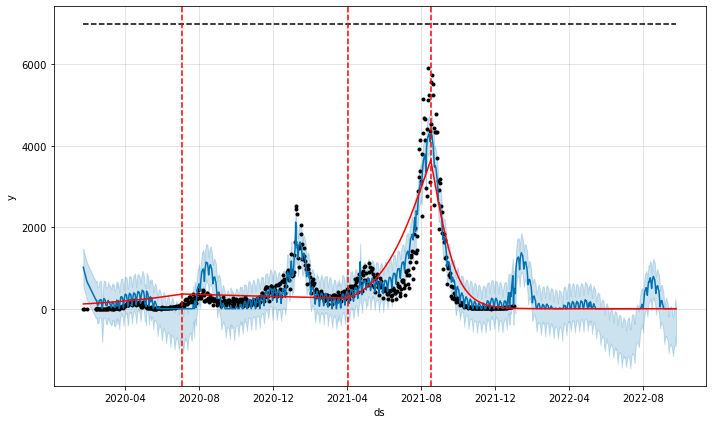

In [9]:
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
forecast['cap'] = 7000
forecast['floor'] = 0
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)
plt.show()

In [10]:
z = pd.read_csv('result1.csv')

In [11]:
z = z.rename(columns={'日付': 'ds', '人数': 'y'})
z

,Unnamed: 0,ds,y
0,0,2022-01-01,78
1,1,2022-01-02,82
2,2,2022-01-03,103
3,3,2022-01-04,151
4,4,2022-01-05,388
...,...,...,...
261,261,2022-09-19,4069
262,262,2022-09-20,3794
263,263,2022-09-21,7059
264,264,2022-09-23,7559


In [12]:
import numpy as np

In [13]:
y = forecast
np.mean(abs(z['y'] - y['yhat']))

10124.207434005782